In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Optional
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reload data if needed
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=column_names)
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
X = df.drop('target', axis=1)
y = df['target']
X_scaled = StandardScaler().fit_transform(X)


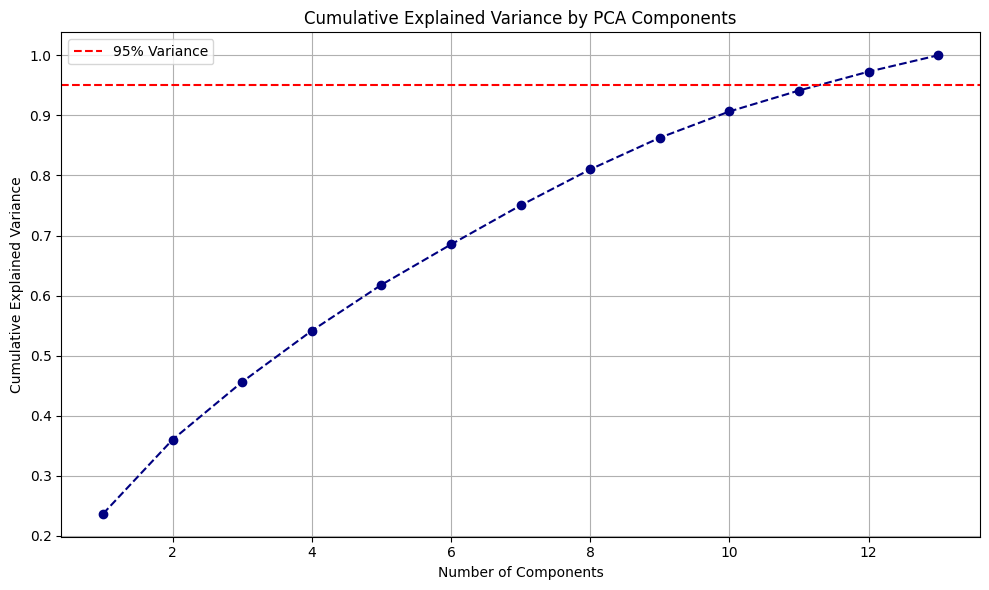

In [3]:
# 2.1 Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 2.2 Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 2.3 Plot Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='navy')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.tight_layout()
plt.show()


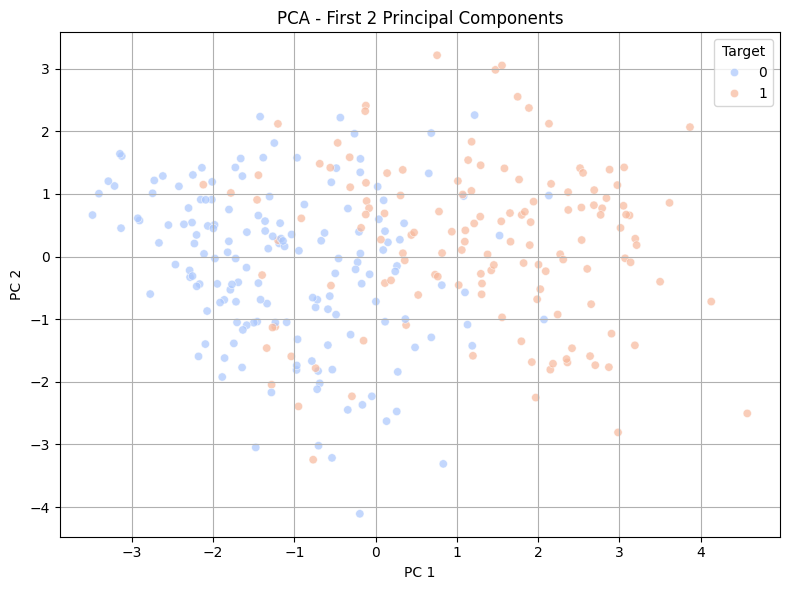

In [4]:
# 2.4 Visualize first two principal components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title("PCA - First 2 Principal Components")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Target")
plt.grid(True)
plt.tight_layout()
plt.show()
